### GPU 사용

In [1]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


### 만들어둔 model 불러오기

In [2]:
from model_paper import VGGNet16

In [3]:
vgg16 = VGGNet16(dataset ='cifar10', num_classes=10).to(device)

In [4]:
from torchinfo import summary
summary(vgg16, (64, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
VGGNet16                                 [64, 10]                  --
├─Sequential: 1-1                        [64, 512, 1, 1]           --
│    └─Sequential: 2-1                   [64, 64, 16, 16]          --
│    │    └─Conv2d: 3-1                  [64, 64, 32, 32]          1,792
│    │    └─ReLU: 3-2                    [64, 64, 32, 32]          --
│    │    └─Conv2d: 3-3                  [64, 64, 32, 32]          36,928
│    │    └─ReLU: 3-4                    [64, 64, 32, 32]          --
│    │    └─MaxPool2d: 3-5               [64, 64, 16, 16]          --
│    └─Sequential: 2-2                   [64, 128, 8, 8]           --
│    │    └─Conv2d: 3-6                  [64, 128, 16, 16]         73,856
│    │    └─ReLU: 3-7                    [64, 128, 16, 16]         --
│    │    └─Conv2d: 3-8                  [64, 128, 16, 16]         147,584
│    │    └─ReLU: 3-9                    [64, 128, 16, 16]         --

### CIFAR10 불러오기

In [5]:
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [7]:
batch_size = 128

In [8]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [9]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=0)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

In [10]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

### 학습하기

In [11]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16.parameters(), lr=0.001)

In [12]:
epochs = 30

In [13]:
from tqdm import tqdm
accuracy_list = []
loss_list = []

n = len(trainloader) # 배치 개수

for epoch in range(epochs):
    running_loss = 0.0
    for data in tqdm(trainloader):
        inputs, labels = data[0].to(device), data[1].to(device)
        
        optimizer.zero_grad()
        
        outputs = vgg16(inputs)
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    with torch.no_grad():
        total = 0
        correct = 0
        for data in testloader:
            images, labels = data
        
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = vgg16(images)
            _, predicted = torch.max(outputs.data, 1)
            
            total += labels.size(0)
            correct += (predicted==labels).sum()
        
    avg_loss = running_loss/n
    accuracy = 100*correct/total
        
    loss_list.append(avg_loss)
    accuracy_list.append(accuracy.cpu().numpy())
    
    print("epoch : {}".format(epoch+1))
    print('loss : {:.6f}'.format(avg_loss))
    print("Accuracy : {:.2f}%".format(accuracy))

100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 15.00it/s]


epoch : 1
loss : 2.057128
Accuracy : 24.66%


100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.23it/s]


epoch : 2
loss : 1.802655
Accuracy : 29.20%


100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.15it/s]


epoch : 3
loss : 1.610810
Accuracy : 41.76%


100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.14it/s]


epoch : 4
loss : 1.414067
Accuracy : 48.88%


100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.82it/s]


epoch : 5
loss : 1.229887
Accuracy : 57.48%


100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.17it/s]


epoch : 6
loss : 1.083080
Accuracy : 62.65%


100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.19it/s]


epoch : 7
loss : 0.974716
Accuracy : 62.87%


100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.18it/s]


epoch : 8
loss : 0.870477
Accuracy : 67.97%


100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.26it/s]


epoch : 9
loss : 0.797189
Accuracy : 69.51%


100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.29it/s]


epoch : 10
loss : 0.723630
Accuracy : 70.67%


100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.19it/s]


epoch : 11
loss : 0.658681
Accuracy : 71.51%


100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.32it/s]


epoch : 12
loss : 0.600840
Accuracy : 72.15%


100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.36it/s]


epoch : 13
loss : 0.567337
Accuracy : 71.97%


100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.28it/s]


epoch : 14
loss : 0.521217
Accuracy : 73.16%


100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.32it/s]


epoch : 15
loss : 0.481433
Accuracy : 73.92%


100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.29it/s]


epoch : 16
loss : 0.436169
Accuracy : 74.09%


100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.30it/s]


epoch : 17
loss : 0.414254
Accuracy : 73.07%


100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.35it/s]


epoch : 18
loss : 0.383157
Accuracy : 73.68%


100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.29it/s]


epoch : 19
loss : 0.439796
Accuracy : 74.58%


100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.22it/s]


epoch : 20
loss : 0.339025
Accuracy : 74.16%


100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.36it/s]


epoch : 21
loss : 0.313669
Accuracy : 74.90%


100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.40it/s]


epoch : 22
loss : 0.338226
Accuracy : 73.01%


100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.39it/s]


epoch : 23
loss : 0.294266
Accuracy : 74.33%


100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.28it/s]


epoch : 24
loss : 0.251063
Accuracy : 74.54%


100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.25it/s]


epoch : 25
loss : 0.264242
Accuracy : 74.21%


100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.35it/s]


epoch : 26
loss : 0.228181
Accuracy : 74.82%


100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.23it/s]


epoch : 27
loss : 0.235957
Accuracy : 74.16%


100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.17it/s]


epoch : 28
loss : 0.241161
Accuracy : 75.44%


100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.19it/s]


epoch : 29
loss : 0.224801
Accuracy : 74.32%


100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.25it/s]


epoch : 30
loss : 0.211115
Accuracy : 73.90%


### loss & accuracy 시각화

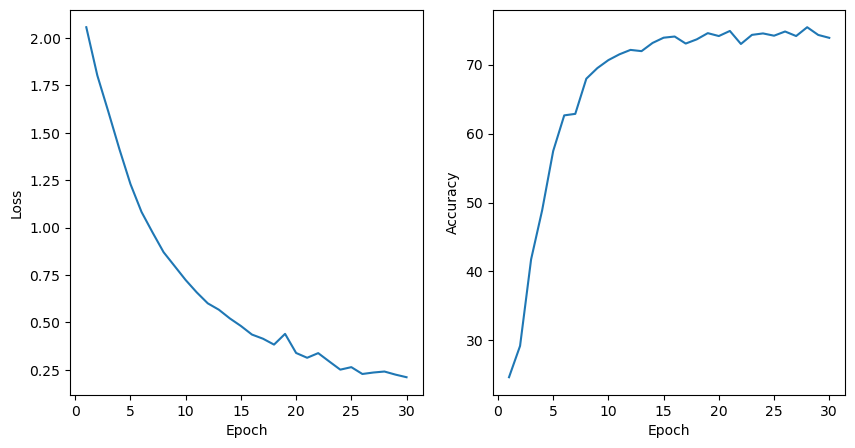

In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(np.arange(1,epochs+1),loss_list)
plt.subplot(1,2,2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(np.arange(1,epochs+1), accuracy_list)
plt.show()

### model 저장

In [17]:
PATH = './cifar_vgg16.pth'
torch.save(vgg16.state_dict(), PATH)

### model 불러오기

In [18]:
net = VGGNet16(dataset ='cifar10', num_classes=10).to(device)
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [19]:
correct = 0
total = 0

with torch.no_grad():
    for data in tqdm(testloader):
        images, labels = data
        
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:03<00:00, 25.26it/s]

Accuracy of the network on the 10000 test images: 73 %


In [20]:
# 각 분류(class)에 대한 예측값 계산을 위해 준비
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in tqdm(testloader):
        images, labels = data
        
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # 각 분류별로 올바른 예측 수를 모읍니다
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# 각 분류별 정확도(accuracy)를 출력합니다
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.10it/s]

Accuracy for class: plane is 79.3 %
Accuracy for class: car   is 86.6 %
Accuracy for class: bird  is 64.6 %
Accuracy for class: cat   is 55.7 %
Accuracy for class: deer  is 59.1 %
Accuracy for class: dog   is 66.2 %
Accuracy for class: frog  is 75.8 %
Accuracy for class: horse is 76.5 %
Accuracy for class: ship  is 83.2 %
Accuracy for class: truck is 89.4 %
